In [86]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Recape of simple linear regression

In [67]:
mtcars = pd.read_csv(r"C:\Users\keert\OneDrive\Documents\mtcars.csv")
# Drop the target variale
X_features = mtcars.drop(['mpg'],axis=1)
# Add constant intercept term 1 to dataset
X = sm.add_constant(X_features)
y = mtcars['mpg']
# Split  data into train and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)
# Fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.786   
Dependent Variable: mpg              AIC:                128.9768
Date:               2023-12-19 10:47 BIC:                142.3844
No. Observations:   25               Log-Likelihood:     -53.488 
Df Model:           10               F-statistic:        9.804   
Df Residuals:       14               Prob (F-statistic): 9.89e-05
R-squared:          0.875            Scale:              7.5460  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    -5.5937    30.4913   -0.1835   0.8571   -70.9911   59.8037
cyl      -0.4762     1.1831   -0.4025   0.6934    -3.0137    2.0612
disp      0.0183     0.0209    0.8779   0.3948    -0.0264    0.0630
hp       -0.0095     0.0313   -0.3038   0.7658    -0.0766    0.0576
drat      1.0021     2.2093    0.4536   0.6571    -3.7364    5.7407
wt       -4.8620     2.6004   -1.8698   0.0826   -10.4393    0.7152
qsec      1.8410     1.5070    1.2216   0.2420    -1.3913    5.0732
vs       -1.9372     3.0771   -0.6296   0.5391    -8.5368    4.6625
am        1.0766     2.4830    0.4336   0.6712    -4.2490    6.4022
gear      1.3271     1.7453    0.7604   0.4596    -2.4163    5.0705
carb      0.1471     1.1458    0.1284   0.8996    -2.3103    2.6046
-----------------------------------------------------------------
Omnibus:              2.280        Durbin-Watson:           2.374
Prob(Omnibus):        0.320        Jarque-Bera (JB):        1.965
Skew:                 0.641        Prob(JB):                0.374
Kurtosis:             2.508        Condition No.:           16579
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [5]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [88]:
# Build model
import statsmodels.formula.api as smf
model = smf.ols('mpg~wt+vs+am+gear+carb+qsec+cyl+disp+hp+drat',data=mtcars).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.807   
Dependent Variable: mpg              AIC:                161.7098
Date:               2023-12-19 11:36 BIC:                177.8329
No. Observations:   32               Log-Likelihood:     -69.855 
Df Model:           10               F-statistic:        13.93   
Df Residuals:       21               Prob (F-statistic): 3.79e-07
R-squared:          0.869            Scale:              7.0235  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    12.3034   18.7179   0.6573  0.5181  -26.6226  51.2293
wt           -3.7153    1.8944  -1.9612  0.0633   -7.6550   0.2243
vs            0.3178    2.1045   0.1510  0.8814   -4.0588   4.6943
am            2.5202    2.0567   1.2254  0.2340   -1.7568   6.7973
gear          0.6554

In [13]:
#Coefficient
model.params

Intercept    12.303374
wt           -3.715304
vs            0.317763
am            2.520227
gear          0.655413
carb         -0.199419
qsec          0.821041
cyl          -0.111440
disp          0.013335
hp           -0.021482
drat          0.787111
dtype: float64

In [14]:
# t and p-values
print(model.tvalues,'\n',model.pvalues)

Intercept    0.657306
wt          -1.961189
vs           0.150991
am           1.225404
gear         0.438914
carb        -0.240626
qsec         1.123413
cyl         -0.106639
disp         0.746758
hp          -0.986841
drat         0.481304
dtype: float64 
 Intercept    0.518124
wt           0.063252
vs           0.881423
am           0.233990
gear         0.665206
carb         0.812179
qsec         0.273941
cyl          0.916087
disp         0.463489
hp           0.334955
drat         0.635278
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8690157644777647, 0.806642318990986)

In [16]:
X_features.corr()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
carb,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.057534,0.274073,1.000000


In [17]:
model_2 = smf.ols('mpg~wt+vs+am+gear+carb+qsec',data=mtcars).fit()
print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.826   
Dependent Variable: mpg              AIC:                155.9848
Date:               2023-12-19 09:45 BIC:                166.2449
No. Observations:   32               Log-Likelihood:     -70.992 
Df Model:           6                F-statistic:        25.46   
Df Residuals:       25               Prob (F-statistic): 1.66e-09
R-squared:          0.859            Scale:              6.3345  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     11.0050    9.8636   1.1157  0.2752  -9.3094  31.3193
wt            -3.1389    1.0100  -3.1077  0.0047  -5.2191  -1.0587
vs             0.0350    1.8261   0.0192  0.9849  -3.7259   3.7959
am             2.8836    1.8060   1.5967  0.1229  -0.8358   6.6031
gear           0.853

In [18]:
X_features.dtypes

cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

array([[<Axes: xlabel='cyl', ylabel='cyl'>,
        <Axes: xlabel='disp', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='drat', ylabel='cyl'>,
        <Axes: xlabel='wt', ylabel='cyl'>,
        <Axes: xlabel='qsec', ylabel='cyl'>,
        <Axes: xlabel='vs', ylabel='cyl'>,
        <Axes: xlabel='am', ylabel='cyl'>,
        <Axes: xlabel='gear', ylabel='cyl'>,
        <Axes: xlabel='carb', ylabel='cyl'>],
       [<Axes: xlabel='cyl', ylabel='disp'>,
        <Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='hp', ylabel='disp'>,
        <Axes: xlabel='drat', ylabel='disp'>,
        <Axes: xlabel='wt', ylabel='disp'>,
        <Axes: xlabel='qsec', ylabel='disp'>,
        <Axes: xlabel='vs', ylabel='disp'>,
        <Axes: xlabel='am', ylabel='disp'>,
        <Axes: xlabel='gear', ylabel='disp'>,
        <Axes: xlabel='carb', ylabel='disp'>],
       [<Axes: xlabel='cyl', ylabel='hp'>,
        <Axes: xlabel='disp', ylabel='hp'>,
        <Axes: xlab

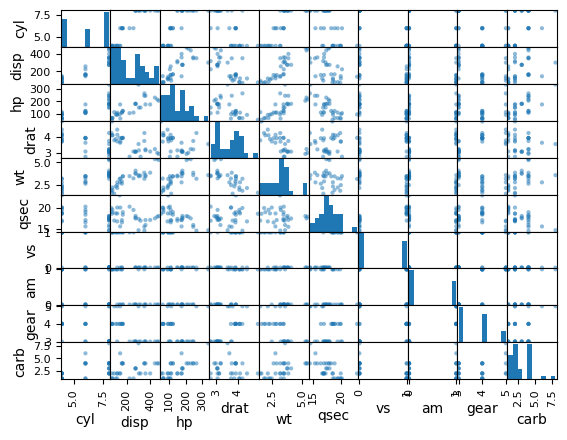

In [19]:
from pandas import plotting
plotting.scatter_matrix(X_features)

<Axes: >

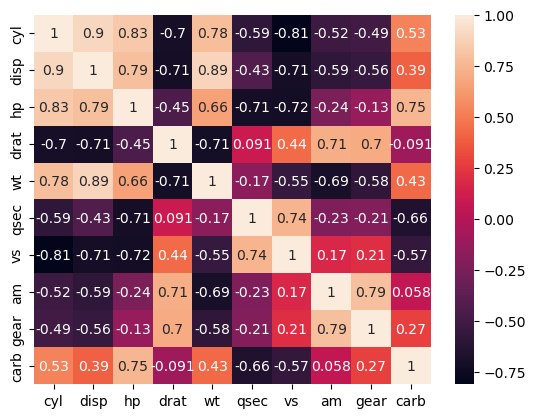

In [20]:
sns.heatmap(X_features.corr(),annot=True)

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


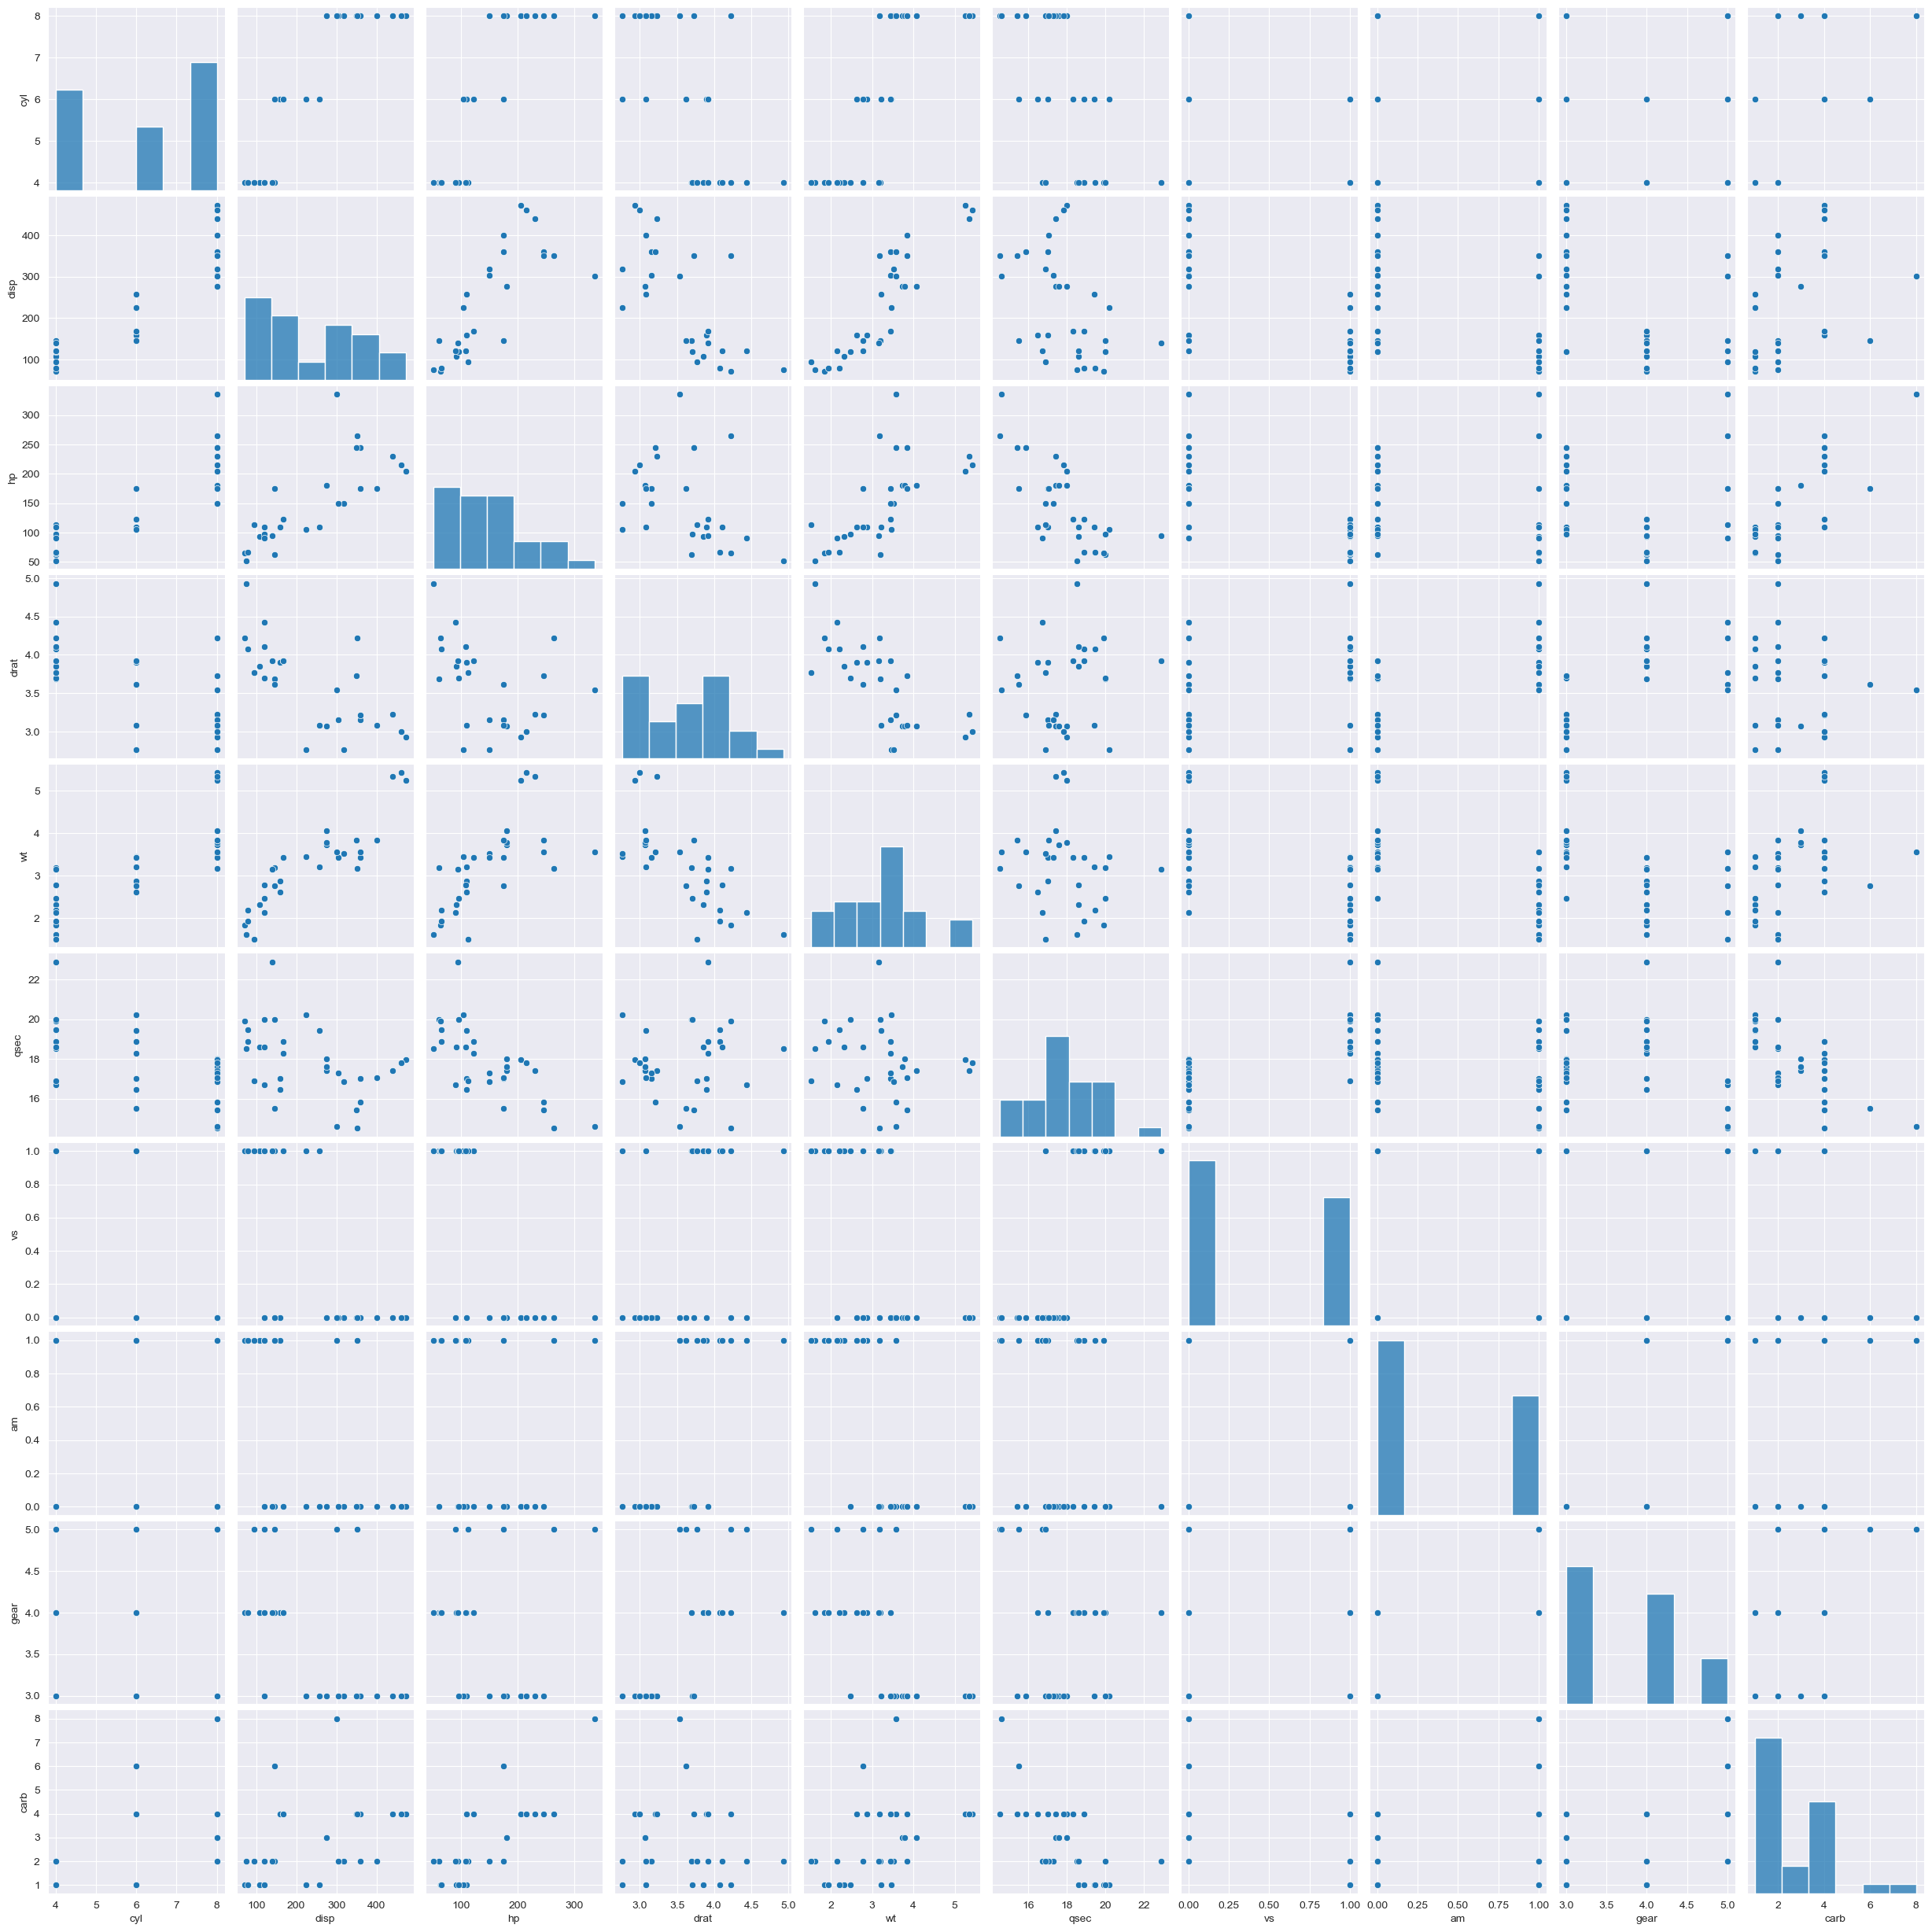

In [17]:
sns.set_style(style='darkgrid')
sns.pairplot(X_features)

# Multi collinearity and Variance Inflation Factor: 

In [21]:
'cyl','disp','hp','drat','wt','qsec','am','vs','gear','carb'

('cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'am', 'vs', 'gear', 'carb')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [23]:
calc_vif(X)

,variables,VIF
0,const,1596.273030
1,cyl,15.373833
2,disp,21.620241
3,hp,9.832037
4,drat,3.374620
5,wt,15.164887
6,qsec,7.527958
7,vs,4.965873
8,am,4.648487
9,gear,5.357452


In [24]:
Z = X.iloc[:]
z = calc_vif(Z)
z.VIF

0     1596.273030
1       15.373833
2       21.620241
3        9.832037
4        3.374620
5       15.164887
6        7.527958
7        4.965873
8        4.648487
9        5.357452
10       7.908747
Name: VIF, dtype: float64

In [25]:
#Build model with wt
model = smf.ols('mpg~wt+hp',data=mtcars).fit()
f'AIC:{model.aic}'

'AIC:154.6523388256413'

# Bayesian Information Criterion

In [26]:
#Build model with wt
model = smf.ols('mpg~wt+hp',data=mtcars).fit()
f'BIC:{model.bic}'

'BIC:159.04954653404047'

# Residual Analysis to validate model assumptions:


# QQ plot

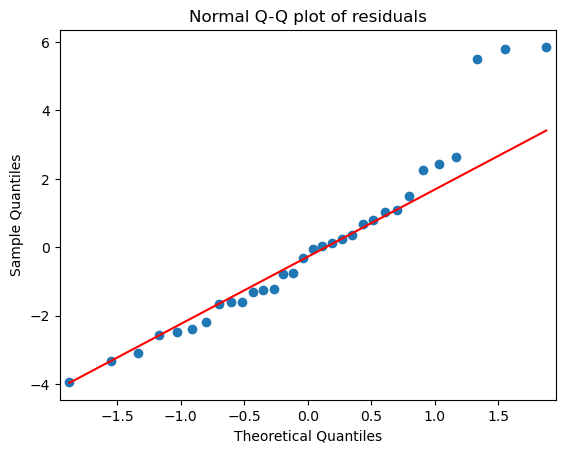

In [27]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# PP plot


<Figure size 800x600 with 0 Axes>

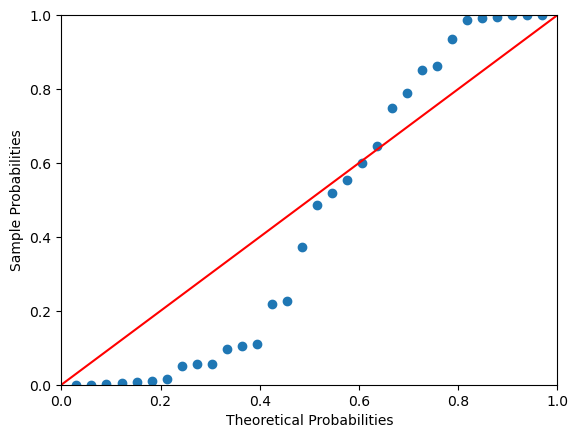

In [28]:
# Test for Normality of Residuals
probplot = sm.ProbPlot(model.resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()

# Residual Plot

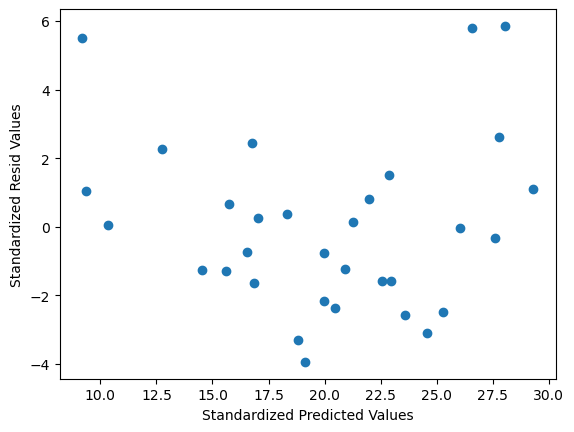

In [29]:
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Resid Values")
plt.show()

In [43]:
model_2 = smf.ols('mpg~hp+drat+qsec+vs+am+gear+carb+wt+cyl',data= X_standr).fit()
print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.811   
Dependent Variable: mpg              AIC:                45.5891 
Date:               2023-12-19 09:56 BIC:                60.2464 
No. Observations:   32               Log-Likelihood:     -12.795 
Df Model:           9                F-statistic:        15.73   
Df Residuals:       22               Prob (F-statistic): 1.18e-07
R-squared:          0.866            Scale:              0.18947 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.0000    0.0769  -0.0000  1.0000  -0.1596   0.1596
hp            -0.1473    0.2087  -0.7060  0.4876  -0.5800   0.2854
drat           0.0824    0.1426   0.5775  0.5694  -0.2134   0.3782
qsec           0.1972    0.2056   0.9594  0.3478  -0.2291   0.6236
vs             0.013

In [41]:
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()
X_standr = standardized_values(mtcars)

In [42]:
X_standr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.150885,-0.104988,-0.570620,-0.535093,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203
1,0.150885,-0.104988,-0.570620,-0.535093,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203
2,0.449543,-1.224858,-0.990182,-0.783040,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152
3,0.217253,-0.104988,0.220094,-0.535093,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152
4,-0.230735,1.014882,1.043081,0.412942,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034
5,-0.330287,-0.104988,-0.046167,-0.608019,-1.564608,0.248095,1.326987,1.116036,-0.814143,-0.931819,-1.122152
6,-0.960789,1.014882,1.043081,1.433903,-0.722981,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203
7,0.715018,-1.224858,-0.677931,-1.235180,0.174754,-0.027850,1.203871,1.116036,-0.814143,0.423554,-0.503034
8,0.449543,-1.224858,-0.725535,-0.753870,0.604919,-0.068731,2.826755,1.116036,-0.814143,0.423554,-0.503034
9,-0.147774,-0.104988,-0.509299,-0.345486,0.604919,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203


<Axes: >

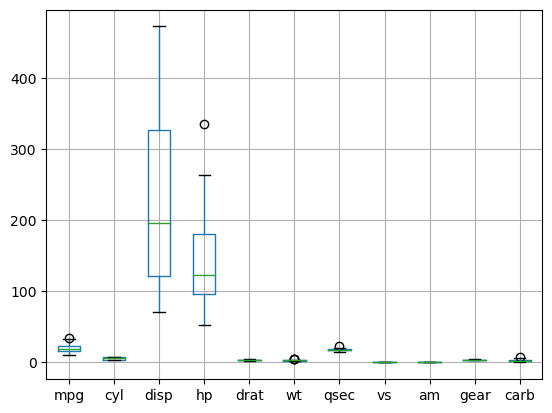

In [44]:
mtcars.boxplot()

# Outlier Analysis

In [46]:
X_features = mtcars.drop(['mpg'], axis=1)
X = sm.tools.tools.add_constant(X_features)
y = mtcars['mpg']
sm_model = sm.regression.linear_model.OLS(y,X).fit()
influence = sm_model.get_influence()
influence_list = influence.cooks_distance[0]
influence_df = pd.DataFrame(influence_list, columns=["influence"])
influence_df.index = mtcars.index
cook_df = mtcars.merge(influence_df, left_index=True, right_index=True)
cook_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,influence
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2.059098e-02
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,9.218355e-03
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,6.352411e-02
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1.306707e-04
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,4.083138e-03
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,3.697080e-02
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,6.907413e-05
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,3.454201e-02
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,3.792206e-01
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4.282385e-03


In [54]:
# Settin the threshold and getting the outliers
original_length = len(mtcars)
cooks_threshold = 4/original_length
print(cooks_threshold)
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers) / original_length * 100}% of our dataset")

0.125


NameError: name 'cooks_df' is not defined

In [55]:
cooks_outliers.sort_values(by=["influence"])

NameError: name 'cooks_outliers' is not defined

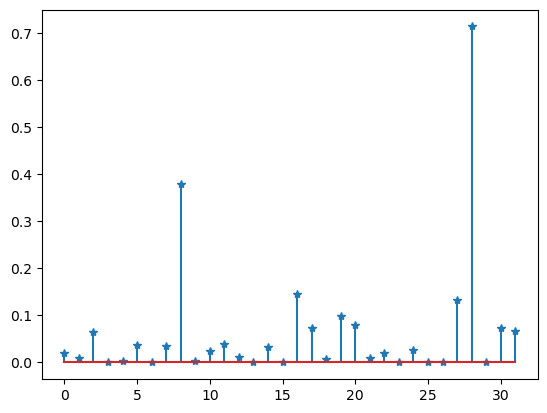

In [49]:
plt.stem(np.arange(len(mtcars)), np.round(influence_list, 3), markerfmt='*')
plt.show()

# Leverage Value

In [53]:
p = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", p, " and number of observations:",n)
leverage_cutoff = 3*((p + 1)/n)
print( "cutoff for leverage value: ", round(leverage_cutoff, 3))

Number of variables: 11  and number of observations: 25
cutoff for leverage value:  1.44


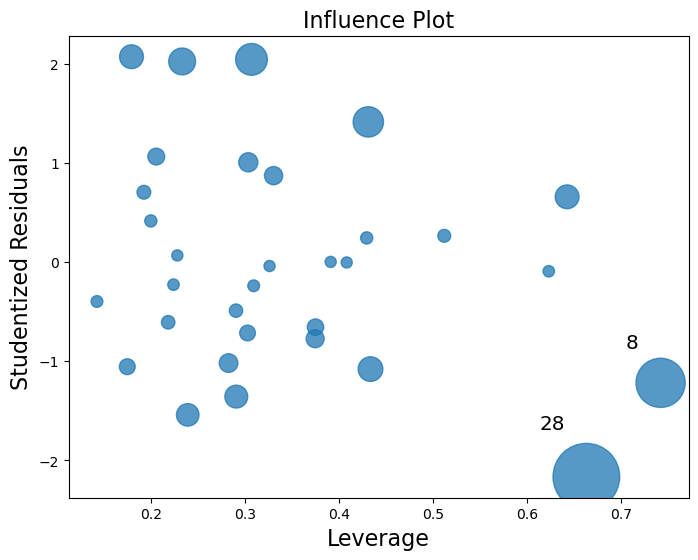

In [91]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax=plt.subplots(figsize=(8,6))
influence_plot(sm_model,ax=ax)
plt.show()

# Improving  model

In [65]:
mtcars1=mtcars.drop(mtcars.index[[16,8,27,28]],axis=0).reset_index()
#Drop the original index
mtcars1=mtcars1.drop(['index'],axis=1)
print(len(mtcars1))

28


In [72]:
X_features = mtcars1.drop(['mpg'], axis=1)
#Add constant intercept term 1 to dataset
X = sm.add_constant(X_features)
y = mtcars1['mpg']
# Split data into train and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=54)
# Fit the regression model
mlr_model_1 = sm.OLS(train_y, train_X).fit()
mlr_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: mpg              AIC:                101.8362
Date:               2023-12-19 10:51 BIC:                113.8376
No. Observations:   22               Log-Likelihood:     -39.918 
Df Model:           10               F-statistic:        19.03   
Df Residuals:       11               Prob (F-statistic): 1.55e-05
R-squared:          0.945            Scale:              4.4114  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const     -82.7349   31.9234  -2.5917  0.0251  -152.9978  -12.4721
cyl         0.4037    1.1491   0.3514  0.7319    -2.1253    2.9328
disp        0.0355    0.0201   1.7695  0.1045    -0.0087    0.0797
hp          0.0380    0.0328   1.1598  0.2707    -0.0341    0.1101
drat        4.0570    2.4627   1.6473  0.1277    -1.3635    9.4774
wt         -7.4444    2.7499  -2.7072  0.0204   -13.4968   -1.3919
qsec        4.1715    1.2960   3.2188  0.0082     1.3190    7.0240
vs         -7.5587    3.7570  -2.0119  0.0694   -15.8277    0.7103
am         -0.7115    2.3844  -0.2984  0.7710    -5.9596    4.5366
gear        8.1897    3.3825   2.4212  0.0339     0.7448   15.6345
carb       -1.4589    1.1985  -1.2172  0.2490    -4.0968    1.1791
-----------------------------------------------------------------
Omnibus:              1.160        Durbin-Watson:           1.381
Prob(Omnibus):        0.560        Jarque-Bera (JB):        0.377
Skew:                 0.304        Prob(JB):                0.828
Kurtosis:             3.201        Condition No.:           21635
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

# Prediction on testing data

In [76]:
y_pred = mlr_model_1.predict(test_X)
y_pred

26    21.174108
24    35.636874
10    12.066644
8     16.313901
25    21.696491
3     18.241168
dtype: float64

In [77]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': test_y, 'Predicted value': y_pred,'Difference': test_y-y_pred})
reg_model_diff

,Actual value,Predicted value,Difference
26,15.0,21.174108,-6.174108
24,26.0,35.636874,-9.636874
10,16.4,12.066644,4.333356
8,19.2,16.313901,2.886099
25,19.7,21.696491,-1.996491
3,21.4,18.241168,3.158832


# Accuracy checking

In [82]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

mae = metrics.mean_absolute_error(test_y, y_pred)
mse = metrics.mean_squared_error(test_y, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(test_y, y_pred))

# Estimating the accuracy of the model using 'r2 score'
print(r2_score(test_y, y_pred))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

-1.2708785550599515
Mean Absolute Error: 4.6976267027172876
Mean Square Error: 28.676780553216798
Root Mean Square Error: 5.35507054605416


# Logistick Regression

In [60]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
dataset = pd.read_csv
#X = dataset.drop('MEDV',axis = 1)
#y = dataset['MEDV']
dataset = pd.read_csv(r"C:\Users\keert\OneDrive\Documents\mtcars.csv")
X = dataset.drop('mpg',axis = 1)
y = dataset['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)
#Lasso regression model
print("\n.....................Lasso Model................\n")
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
train_score_ls = lasso.score(X_train,y_train) 
test_score_ls = lasso.score(X_test,y_test)
print("The train score of lasso model is {}".format(train_score_ls))
print("The test score of lasso model is {}".format(test_score_ls)) 

# Ridge regression model
print("\n.....................Ridge Model................\n")
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
train_score_rg = ridge.score(X_train,y_train) 
test_score_rg = ridge.score(X_test,y_test)
print("The train score of ridge model is {}".format(train_score_rg))
print("The test score of ridge model is {}".format(test_score_rg)) 

#ElasticNet regression model
print("\n.....................ElasticNet Model................\n")
elasticNet = ElasticNet(alpha = 0.01)
elasticNet.fit(X_train,y_train)
train_score_el = elasticNet.score(X_train,y_train) 
test_score_el = elasticNet.score(X_test,y_test)
print("The train score of elasticNet model is {}".format(train_score_el))
print("The test score of elasticNet model is {}".format(test_score_el)) 


.....................Lasso Model................

The train score of lasso model is 0.885553499668181
The test score of lasso model is 0.7505568158179343

.....................Ridge Model................

The train score of ridge model is 0.8858304221046953
The test score of ridge model is 0.748385201828794

.....................ElasticNet Model................

The train score of elasticNet model is 0.8854579775819246
The test score of elasticNet model is 0.7491552232120993


In [93]:
X.shape

(28, 11)

In [98]:
#Load all necessary libraries
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
claimants = pd.read_csv(r"C:\Users\keert\OneDrive\Documents\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [34]:
claimants['SEATBELT'].value_counts()

SEATBELT
0.0    1270
1.0      22
Name: count, dtype: int64

In [35]:
claimants['ATTORNEY'].value_counts()

ATTORNEY
0    685
1    655
Name: count, dtype: int64

In [36]:
claimants['CASENUM'].value_counts()

CASENUM
590      3
1010     3
6330     3
5        2
8400     2
        ..
1308     1
1186     1
1150     1
1139     1
34153    1
Name: count, Length: 1283, dtype: int64

In [37]:
#dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [38]:
#Shape ofthe data set
claimants.shape

(1340, 6)

In [39]:
#Missing values

In [40]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [41]:
claimants.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [42]:
# Removing NA values in data set
claimants = claimants.dropna()

In [43]:
claimants.shape

(1096, 6)

In [44]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [100]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
# Logistic regression and fit the model
classifier = LinearRegression()
classifier.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

LinearRegression()

In [101]:
classifier.score(X,Y)

0.06740699602264077

In [102]:
# Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)


LogisticRegression()

In [103]:
classifier.score(X,Y)

0.708029197080292

In [104]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier.predict(X)

In [105]:
y_pred_df = pd.DataFrame({'actual': Y,'predicted_prob':y_pred})

In [106]:
y_pred_df.head()

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


In [107]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [108]:
print('Accuracy:',(381+395)/(381+395+197+123))

Accuracy: 0.708029197080292


In [109]:
#Classification report
## Precision - what percent of your predictions were correct?
## Recall - what percent of te positive cases did you catch?
## F1 score - what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [110]:
y_predict_prob = classifier.predict_proba(X)[:,1]
y_predict_prob.sum()

517.9998381394487

# Roc Curve

In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(Y, y_predict_prob)
auc = roc_auc_score(Y, y_pred)
auc

0.7108589063606365

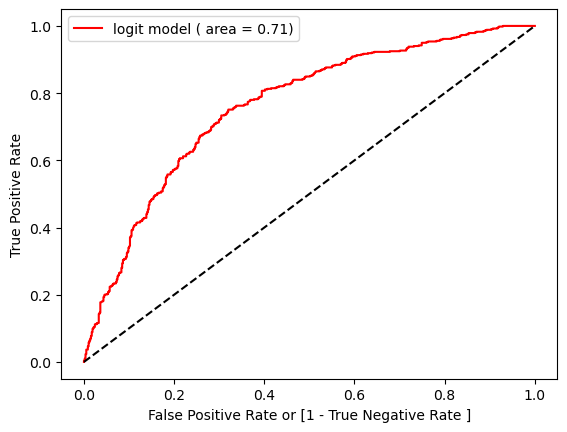

In [130]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate ]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [131]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [132]:
import os 
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.openjfx',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'bluej',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'finalized_model.sav',
 'IntelGraphicsProfiles',
 'Introduction to python.ipynb',
 'Links',
 'Local Settings',
 'Multiple Linear Regression .ipynb',
 'Music',
 'My Documents',
 'myclass',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{fa1dbfca-5e83-11ee-aa28-e4aaeaf24fba}.TM.blf',
 'NTUSER.DAT{fa1dbfca-5e83-11ee-aa28-e4aaeaf24fba}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{fa1dbfca-5e83-11ee-aa28-e4aaeaf24fba}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'PycharmProjects',
 'python practice.ipynb',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Untitled Folder',
 'Untitl

# Multinomial logistic regression 

In [133]:
#read the dataset
abalone_df = pd.read_csv(r"C:\Users\keert\OneDrive\Documents\abalone.csv")
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [134]:
# We are now ready to partition the dataset
Abalone_sex=abalone_df['Sex'].value_counts()
print(Abalone_sex)

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [135]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [136]:
#Create training and test datasets
X = abalone_df.drop(['Sex'], axis=1)
y = abalone_df['Sex']
print(X.columns)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [138]:
model1 = LogisticRegression(multi_class='multinomial',penalty=None, solver='newton-cg')
model1.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None, solver='newton-cg')

In [146]:
preds = model1.predict(X_test)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': None, 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [147]:

from sklearn import metrics
print('Accuracy Score:',metrics.accuracy_score(y_test,y_preds))

class_report=classification_report(y_test,y_preds)
print(class_report)


NameError: name 'y_preds' is not defined